In [2]:
# You need to install packages 
# This an example : 
# Run this in your Notebook 

!pip install missingno


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [103]:
data = pd.read_csv("country_vaccinations.csv")
data.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
7332,Zimbabwe,ZWE,2021-03-15,37660.0,37660.0,NaN,1301.0,306.0,0.25,0.25,NaN,21.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1373023610...
7333,Zimbabwe,ZWE,2021-03-16,39550.0,39550.0,NaN,1890.0,541.0,0.27,0.27,NaN,36.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1373023610...
7334,Zimbabwe,ZWE,2021-03-17,39607.0,39607.0,NaN,57.0,529.0,0.27,0.27,NaN,36.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1373023610...
7335,Zimbabwe,ZWE,2021-03-18,40002.0,40002.0,NaN,395.0,569.0,0.27,0.27,NaN,38.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1373023610...
7336,Zimbabwe,ZWE,2021-03-19,41687.0,41687.0,NaN,1685.0,772.0,0.28,0.28,NaN,52.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1373023610...


In [5]:
#Explore data 
def explore_data(data) :
    return [
     data.info(),
     data.shape,     
            ]
explore_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7337 non-null   object 
 1   iso_code                             7337 non-null   object 
 2   date                                 7337 non-null   object 
 3   total_vaccinations                   4552 non-null   float64
 4   people_vaccinated                    4053 non-null   float64
 5   people_fully_vaccinated              2749 non-null   float64
 6   daily_vaccinations_raw               3830 non-null   float64
 7   daily_vaccinations                   7150 non-null   float64
 8   total_vaccinations_per_hundred       4552 non-null   float64
 9   people_vaccinated_per_hundred        4053 non-null   float64
 10  people_fully_vaccinated_per_hundred  2749 non-null   float64
 11  daily_vaccinations_per_million

[None, (7337, 15)]

<AxesSubplot:>

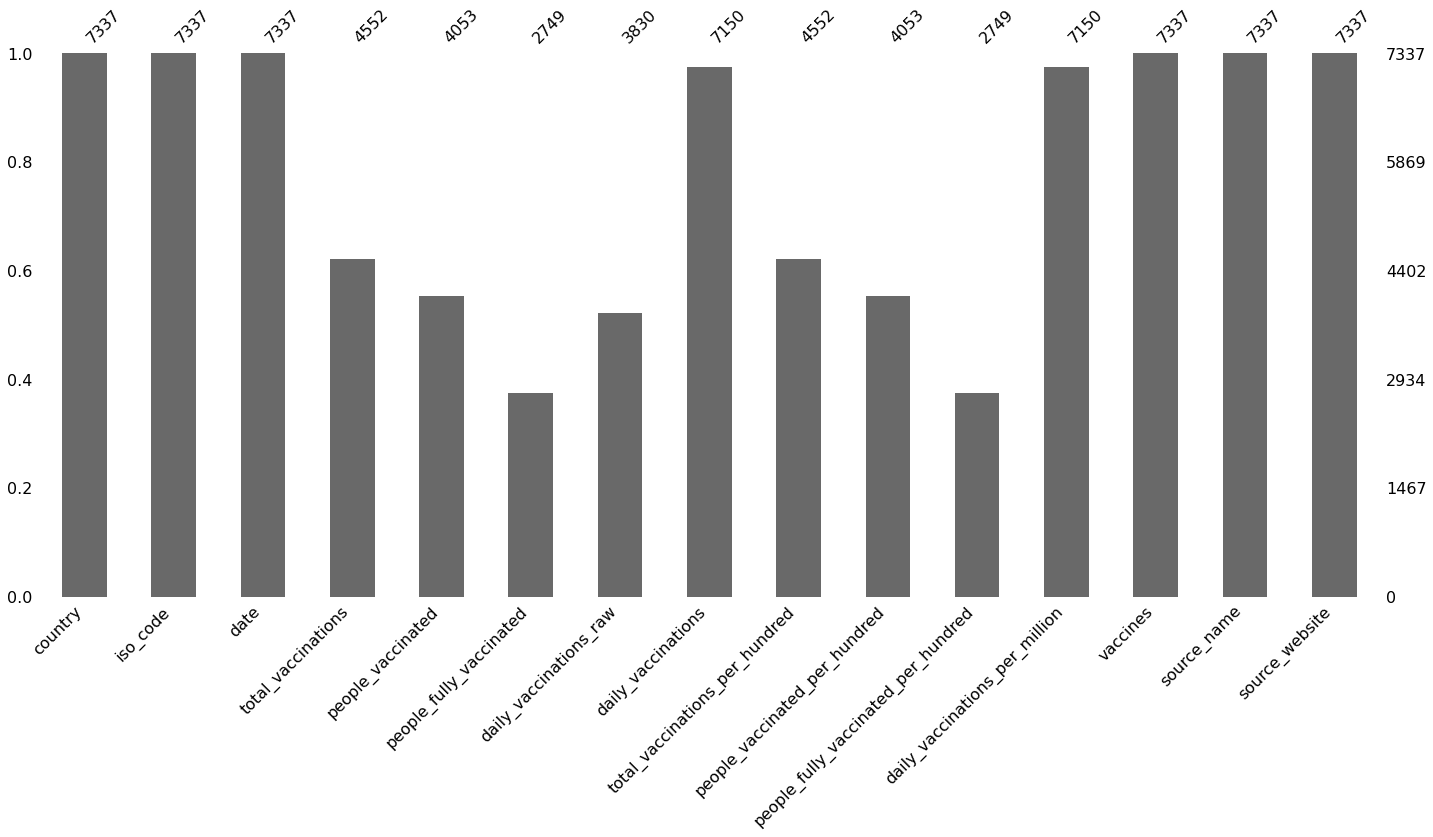

In [6]:
# Missing Data Visualization
msno.bar(data)

In [8]:
# Drop some Columns
col_to_drop = [] # Array of columns to drop from the data
for col in data.columns : 
  missing = np.mean(data[col].isnull())
  if round(missing*100) > 50 : # more than 50% of data is NULL
    col_to_drop.append(col)
print("Columns to drop from the data : ",col_to_drop)
data = data.drop(col_to_drop,axis=1)
print("Drop Succeeded")

Columns to drop from the data :  []
Drop Succeeded


In [9]:
!pip install pycountry-convert


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [10]:
# We need to convert Country name to alpha 2 country code . For example, United States is converted to US
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [11]:
def get_country(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    return (cn_a2_code)

def get_continent(code):
    try:
        cn_continent = country_alpha2_to_continent_code(code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

In [12]:
countries_code = []
contents_code = []
for country in data.country : 
  country_code = get_country(country)
  countries_code.append(country_code)
  contents_code.append(get_continent(country_code))
print("Example of Country code : ",countries_code[:2])
print("Example of Content code : ",contents_code[:2])

data["country_code"], data["content_code"] = countries_code, contents_code

Example of Country code :  ['AF', 'AF']
Example of Content code :  ['AS', 'AS']


In [13]:
# Drop iso_code Column
data = data.drop("iso_code",axis=1)


In [49]:
data.head(3)

,country,date,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,country_code,content_code
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,0.0,0.0,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,AF,AS
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,AF,AS
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,AF,AS


Longitude and Latitude information are extracted based on these alpha 2 country codes. Python’s geopy makes it easy to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources. -> ->

In [15]:
!pip install geopy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [50]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Your mail here ... ") # Nominatim requires this value to be set to your Email. 
# The goal is to be able to limit the number of requests per application.

def latitude(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude)
    except:
        # Return missing value        
        print("Error : Missing Value")
        return np.nan
def longitude(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return  longitude
        return (loc.longitude)
    except:
        # Return missing value
        print("Error : Missing Value")
        return np.nan

In [51]:
df = data.groupby(['country_code','country'])['total_vaccinations'].sum() # total vaccination for each country
df = df.reset_index()
df.columns


Index(['country_code', 'country', 'total_vaccinations'], dtype='object')

In [52]:
df.shape

(150, 3)

In [54]:
print('Missing Values in countries code column : ', df['country_code'].isnull().sum())

Missing Values in countries code column :  0


In [56]:

df['Longitude'] = df['country_code'].apply(longitude)


Error : Missing Value
Error : Missing Value
Error : Missing Value
Error : Missing Value


In [57]:
df['Latitude'] =  df['country_code'].apply(latitude)


Error : Missing Value
Error : Missing Value
Error : Missing Value
Error : Missing Value


In [58]:
df

,country_code,country,total_vaccinations,Longitude,Latitude
0,AD,Andorra,20107.0,1.573203,42.540717
1,AE,United Arab Emirates,313466636.0,44.673665,40.769627
2,AF,Afghanistan,62200.0,66.238514,33.768006
3,AG,Antigua and Barbuda,24164.0,-61.955461,17.223472
4,AI,Anguilla,13032.0,-63.075023,18.195495
...,...,...,...,...,...
145,VC,Saint Vincent and the Grenadines,8952.0,-0.765441,39.681959
146,VE,Venezuela,12351.0,-66.110932,8.001871
147,VN,Vietnam,149464.0,108.426511,13.290403
148,ZA,South Africa,2614168.0,24.086794,-28.579397


In [59]:
df = df.dropna()

In [60]:
df.isnull().sum()

country_code          0
country               0
total_vaccinations    0
Longitude             0
Latitude              0
dtype: int64

In [48]:
#installation
!pip install folium

     |████████████████████████████████| 94 kB 1.3 MB/s 
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [62]:

# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of total vaccination
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    Total vaccination : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['country'],
                                   df.iloc[i]['total_vaccinations']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

<AxesSubplot:ylabel='daily_vaccinations'>

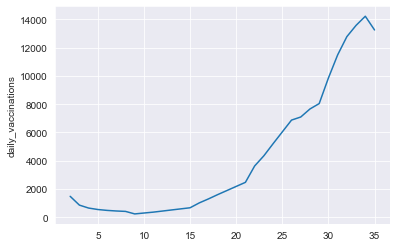

In [106]:
# See the daily vaccination of a choosen country
#Some examples : 
cambodia_data = data[data['country'] == 'Cambodia'] 
sns.set_style("darkgrid")
sns.lineplot(data = cambodia_data, x = range(1,len(cambodia_data)+1), y = "daily_vaccinations")